# tesla prediction

In [39]:
!pip install sklearn

  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=13b61f57972ba8f8f147f7068269c52fc147826f499c017b585a63f69a0d28ad
  Stored in directory: c:\users\dave_\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [13]:
!pip install chart_studio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [15]:
tesla = pd.read_csv('C:\\Users\\dave_\\Downloads\\archive\\TSLA.csv')

In [16]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [17]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [19]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [27]:
print(f'Dataframe contains stock prices between {tesla.Date.min()}) {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00) 2020-02-03 00:00:00
Total days = 3506 days


In [28]:
tesla.describe

<bound method NDFrame.describe of            Date        Open        High         Low       Close   Adj Close  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2    2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3    2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4    2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...         ...         ...         ...         ...         ...         ...   
2411 2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412 2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413 2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414 2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415 2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  


<AxesSubplot:>

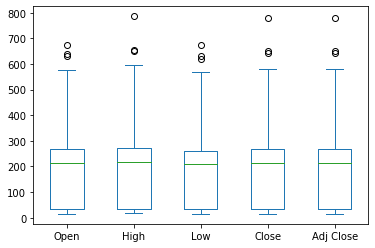

In [29]:
tesla[['Open', 'High','Low','Close','Adj Close']].plot(kind='box')

In [36]:
#set layout of plot
layout = go.Layout(
  title='Stock Prices of Tesla',
  xaxis=dict(
    title='Date',
    titlefont=dict(
      family='Courier New, monospace',
      size=18,
      color='#7f7f7f'
    )
  ),
  yaxis=dict(
      title='Price',
      titlefont=dict(
          family='Courier New, monospace',
          size=18,
          color='#7f7f7f'
      )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [37]:
#plot(plot) #plotting offline
iplot(plot)

In [40]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [42]:
#split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=101)

In [43]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
#create a linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [49]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [50]:
iplot(plot2)

# As we can see, the regression model was not able to predict the sharp upturn in stock that we witnessed in real time in the beginning of 2020

In [53]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.788228331751714	0.8024543287892049
MSE       3018.796360995388	2768.704187535219



# Similar score on both train and test set

# Google prediction - Long short-term memory network

In [56]:
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl 

In [59]:
data = pd.read_csv('C:\\Users\\dave_\\Downloads\\archive\\Google_Stock_Price_Train.csv')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [62]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [64]:
data['Close']=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [66]:
#rescale values to between 0 and 1
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [67]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train, y_train = np.array(X_train),np.array(y_train)

In [68]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [71]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [87]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 4s - loss: 0.0057 - 4s/epoch - 123ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0049 - 4s/epoch - 123ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0046 - 4s/epoch - 128ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0044 - 4s/epoch - 121ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0041 - 4s/epoch - 120ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0056 - 4s/epoch - 123ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0043 - 4s/epoch - 129ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0044 - 4s/epoch - 123ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0044 - 4s/epoch - 120ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0039 - 4s/epoch - 126ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0040 - 4s/epoch - 124ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0041 - 4s/epoch - 121ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0037 - 4s/epoch - 119ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0037 - 4s/epoch - 125ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0035 - 4s/epoch - 121ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0034 - 4s/epoch - 121ms/step
Epoch 17/20
35/35

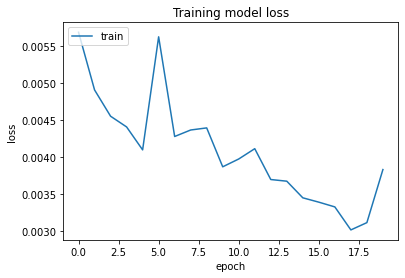

In [88]:
#visualize traininmg model loss
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [96]:
testData = pd.read_csv('C:\\Users\\dave_\\Downloads\\archive\\Google_test_data.csv')
testData['Close'] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [98]:
y_pred = model.predict(X_test)

In [99]:
predicted_price = sc.inverse_transform(y_pred)

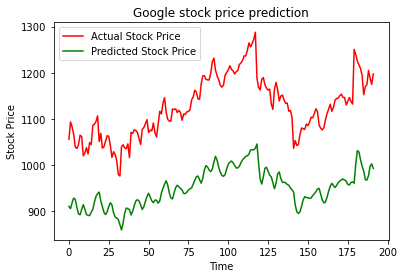

In [101]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()